In [ ]:
!pip install wordcloud_fa

In [95]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from wordcloud_fa import WordCloudFa
import re
import os
import numpy as np

In [97]:
DATA_PATH = '/content/drive/MyDrive/spam_ham_data/'

In [91]:
def removeWeirdChars(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weridPatterns.sub(r'', text)
def get_words(text):  # get all of the words in a tweet and return the list of words
    word_list = text.split()
    return word_list
def get_tweets(text):  # get text and return all of the tweets as a list
    text_list = text.split("\n")
    return text_list
def remove_bad_words(a_text: str):
    for i in range(len(a_text)):
        if '@' in a_text[i]:
            a_text[i] = ""
        elif 'RT' in a_text[i]:
            a_text[i]=""
        elif ord(a_text[i][0]) < 328:
            a_text[i] = ""
        elif "." in a_text[i]:
            a_text[i] = ""
        elif "می" in a_text[i]:
            a_text[i] = ""
        elif len(a_text[i]) < 3:
            a_text[i] = ""
        elif '!' in a_text[i]:
            a_text[i] = ""
        elif 'اومد' in a_text[i]:
            a_text[i] = ""
        elif 'داشت' in a_text[i]:
            a_text[i] = ""
        elif 'دار' in a_text[i]:
            a_text[i] = ""
        elif 'کن' in a_text[i]:
            a_text[i] = ""
        elif 'شد' in a_text[i]:
            a_text[i] = ""
        elif 'من' in a_text[i]:
            a_text[i] = ""
        elif 'زد' in a_text[i]:
            a_text[i] = ""
        elif 'این' in a_text[i]:
            a_text[i] = ""
        elif 'بش' in a_text[i]:
            a_text[i] = ""
        elif 'باش' in a_text[i]:
            a_text[i] = ""
        elif 'رسید' in a_text[i]:
            a_text[i] = ""
        elif '(' in a_text[i]:
            a_text[i] = ""
        elif ')' in a_text[i]:
            a_text[i] = ""
        elif "ببین" in a_text[i]:
            a_text[i] = ""
        elif "دید" in a_text[i]:
            a_text[i]=""
        elif "بود" in a_text[i]:
            a_text[i]=""
    return a_text

In [99]:
def get_wordcloud(text):
  mask_path = "/content/image-2.png"
  mask_array = np.array(Image.open(mask_path))
  my_wc = WordCloudFa(width=1200, height=1200, background_color="white", persian_normalize=True,
                      repeat=False, collocations=False, mask = mask_array)
  my_wc.add_stop_words_from_file(os.path.join(DATA_PATH,"kian_stop_words.txt"))
  text = "\n".join(text)
  text = get_words(text)
  text = remove_bad_words(text)
  print(len(text))
  text1 = "\n".join(text)
  text1 = removeWeirdChars(text1)
  my_wc.generate(text1)
  return my_wc

In [98]:
emails_df = pd.read_csv(os.path.join(DATA_PATH,'emails.csv'))

In [5]:
emails_df.head()

,text,label
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham


In [6]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [7]:
emails_df.label.value_counts()

ham     500
spam    500
Name: label, dtype: int64

In [13]:
oe = OrdinalEncoder()
emails_df['label_num'] = oe.fit_transform(emails_df[['label']])

In [14]:
emails_df.head()

,text,label,label_num
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham,0.0
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham,0.0
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham,0.0
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham,0.0
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham,0.0


In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [20]:
for train_index, test_index in split.split(emails_df, emails_df["label_num"]):
  train_set = emails_df.loc[train_index]
  test_set = emails_df.loc[test_index]

In [21]:
train_set.label.value_counts()

ham     400
spam    400
Name: label, dtype: int64

In [116]:
X_train, X_test, y_train, y_test = train_set.text, test_set.text, train_set.label_num, test_set.label_num

In [22]:
test_set.label.value_counts()

ham     100
spam    100
Name: label, dtype: int64

In [107]:
all_text = emails_df.text.tolist()
spam_text = emails_df.loc[emails_df['label']=='spam'].text.tolist()
ham_text = emails_df.loc[emails_df['label']=='ham'].text.tolist()

In [117]:
train_text = X_train.tolist()
def normalize_text(text):
  text = "\n".join(train_text)
  text = get_words(text)
  text = remove_bad_words(text)
  print(len(text))
  text1 = "\n".join(text)
  text1 = removeWeirdChars(text1)
  return text1
train_text = normalize_text(train_text)

259746


In [106]:
spam_wc = get_wordcloud(spam_text)
ham_wc = get_wordcloud(ham_text)

226969
92471


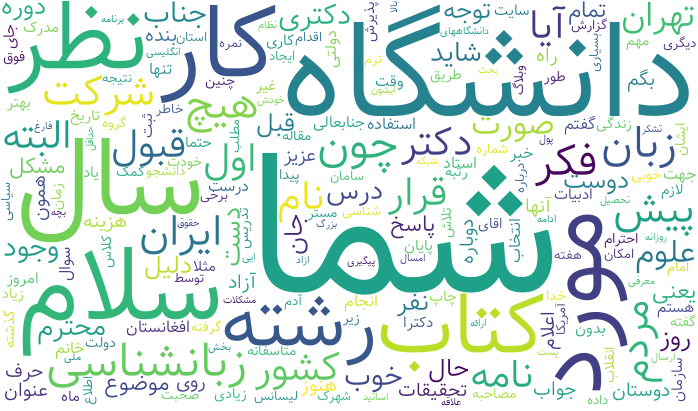

In [101]:
ham_wc.to_image()

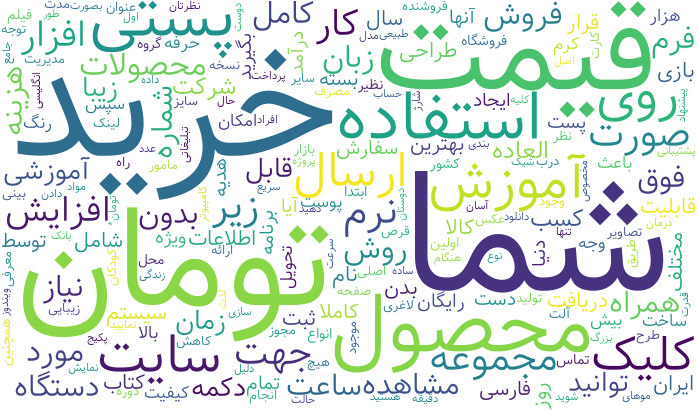

In [102]:
spam_wc.to_image()

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
input= train_text
)
features_train_transformed = vectorizer.fit_transform(X_train) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(X_test) #gives tf idf vector for x_test

In [152]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
print(f"classifier accuracy : {classifier.score(features_test_transformed, y_test) * 100}")

classifier accuracy : 96.5


In [121]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[97  3]
 [ 4 96]]
Accuracy Score : 0.965
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       100
         1.0       0.97      0.96      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

F-Measure: 0.965


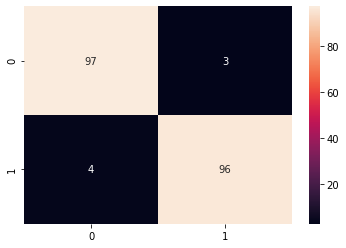

In [161]:
import seaborn as sns
sns.heatmap(results, annot=True)

In [146]:
email_text = ['''تخمین حقوق 1400 پرسنل با استفاده از داده های گردآوری شده از 60 هزار نفر

" کارفرمای گرامی "

ایران سلری محصولی از ایران تلنت در حوزه حقوق و دستمزد است که با گردآوری اطلاعات حقوق دستمزد بیش از 60 هزار نفر در سال 99، به شما این امکان را می­ دهد تا با کسب آگاهی در مورد حقوق دریافتی افراد در هر رده شغلی، تخمین حقوق و دستمزد پرسنل خود در سال 1400 را به آسانی و با دقیق­ ترین شکل ممکن انجام دهید.

دریافت دموی رایگان
شما می توانید با مشاوره رایگان با تیم فروش ایران سلری از نحوه استفاده از این گزارش برای تخمین حقوق 1400 نیز مطلع شوید.

 

آنچه از این گزارش دریافت خواهید کرد:

مقایسه حقوق و دستمزد پرداختی شرکت شما با دیگر سازمان ها
اطلاعات حقوقی سمت های مختلف
میزان پرداختی شرکت های مشابه شما برای مشاغل مختلف
تفاوت پرداختی در استان های مختلف
مشاهده فاکتورهای اثر گذار روی حقوق افراد''','''سلام وقت تون بخیر
خیلی دوست داشتم این ارائه رو شرکت کنم اما متاسفانه نرسیدم، بسیار ممنون میشم اگر فیلم این ارائه را در اختیار بنده هم قرار دهید. 
''']

In [147]:
def get_label(email_text_list):
  spam_test_transformed  = vectorizer.transform(email_text_list)
  spam_ham = ['ham','spam']
  labels_num = list(classifier.predict(spam_test_transformed))
  labels = []
  for i in labels_num:
    labels.append(spam_ham[int(i)])
  return labels

In [149]:
get_label(email_text)

['spam', 'ham']